---

# Title: Titanic Titanic - Machine Learning from Disaster

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: Muhammad Hassaan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/MHassaan2) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


---

### 1. **Meta Data**
   - **Title:** "Titanic: Machine Learning from Disaster - Predicting Survivors"
   - **Author:** Muhammad Hassaan
   - **Date:** August 8th, 2024.

### 2. **Introduction**
   - **Context:** The Titanic dataset is one of the most well-known datasets in the data science community. It provides a great introduction to machine learning concepts, such as data preprocessing, feature engineering, and model evaluation. The goal is to predict whether a passenger survived the Titanic disaster using various features like age, gender, class, etc.
   - **Objective:** The main objective of this notebook is to build a predictive model that accurately classifies passengers as survivors or non-survivors based on their characteristics.

### 3. **Content Outline**
   1. **Load and Explore the Data**
      - Import necessary libraries.
      - Load the training and test datasets.
      - Display the first few rows to understand the data structure.
   
   2. **Data Preprocessing**
      - Handle missing values in the dataset.
      - Convert categorical variables into numerical formats.
      - Feature engineering to create new useful features.

   3. **Exploratory Data Analysis (EDA)**
      - Visualize the data to uncover patterns and correlations.
      - Analyze the relationship between features and the target variable.

   4. **Model Building**
      - Choose and train machine learning models (e.g., Logistic Regression, Random Forest).
      - Evaluate models using cross-validation and other performance metrics.
   
   5. **Prediction and Submission**
      - Apply the trained model to the test dataset.
      - Prepare the submission file as per Kaggle’s format.
      - Submit predictions to Kaggle.

### 5. **Aims and Objectives**
   - **Primary Aim:** To develop a machine learning model that can predict the survival of passengers on the Titanic.
   - **Objectives:**
     1. **Understand the Dataset:** Gain insights into the data and its structure.
     2. **Data Cleaning:** Preprocess and clean the data to make it suitable for modeling.
     3. **Feature Engineering:** Create new features that may improve the model's accuracy.
     4. **Model Selection:** Experiment with different machine learning algorithms to find the best fit for the problem.
     5. **Evaluation:** Evaluate the model's performance using appropriate metrics.
     6. **Submission:** Prepare and submit predictions to Kaggle.

### 6. **Conclusion**
   - **Summary of Results:** Briefly summarize the performance of your model and any key findings.
   - **Future Work:** Discuss possible improvements or next steps you could take to refine your model.


---

# **The data**
**There are three files in the data: (1) train.csv, (2) test.csv, and (3) gender_submission.csv.**

* `(1) train.csv`
**train.csv** contains the details of a subset of the passengers on board (891 passengers, to be exact -- where each passenger gets a different row in the table). To investigate this data, click on the name of the file on the left of the screen. Once you've done this, you can view all of the data in the window.

he values in the second column ("Survived") can be used to determine whether each passenger survived or not:

if it's a "1", the passenger survived.
if it's a "0", the passenger died.
For instance, the first passenger listed in train.csv is Mr. Owen Harris Braund. He was 22 years old when he died on the Titanic.

* `(2) test.csv`
Using the patterns you find in train.csv, you have to predict whether the other 418 passengers on board (in test.csv) survived.

* `(3) gender_submission.csv`
The **gender_submission.csv** file is provided as an example that shows how you should structure your predictions. It predicts that all female passengers survived, and all male passengers died. Your hypotheses regarding survival will probably be different, which will lead to a different submission file. But, just like this file, your submission should have:

* a "PassengerId" column containing the IDs of each passenger from test.csv.
* a "Survived" column (that you will create!) with a "1" for the rows where you think the passenger survived, and a "0" where you predict that the passenger died.

---

### **1. Load and Explore the Data**

In [273]:
# import libraries
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style='whitegrid'

In [274]:
# load the dataset
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [275]:
# display the first few rows of the train dataset 
print("First few rows of the training data:")
df_train.head()

First few rows of the training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [276]:
# display the first few rows of the test dataset 
print("First few rows of the Testing data:")
df_test.head()

First few rows of the Testing data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [277]:
# get information of the training data (data-types, non-null counts)
print("\nInformation about training data:")
df_train.info()


Information about training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [278]:
# summary statistics of the traiing data 
print("\nSummary statistics of training data:")
df_train.describe()


Summary statistics of training data:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [279]:
# chech for missing values in training dataset 
print("\nMissing values in training data:")
df_train.isnull().sum()


Missing values in training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [280]:
# chech for missing values in testing dataset
print("\nMissing values in testing data:")
df_test.isnull().sum()


Missing values in testing data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### So there are missing values in both, training and testing data.

---

## **Data Preprocessing**

---

### **Missing Values Handling**

To handle missing values in the Titanic dataset, we'll take different approaches based on the type and significance of the data in each column.

---

In [281]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. **Handling Missing Values in Age:**
* Approach: Since `Age` is a numeric variable and has 177 missing values, we'll fill these with the median age of the passengers. The median is less sensitive to outliers compared to the mean.

In [282]:
# fill missing values in "Age" with the median 
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_train['Age'].median(), inplace=True)

# print results 
print("Number of missing values in `Age` after imputation (training): ", df_train['Age'].isnull().sum())
print("Number of missing values in `Age` after imputation (testing): ", df_test['Age'].isnull().sum())

Number of missing values in `Age` after imputation (training):  0
Number of missing values in `Age` after imputation (testing):  0


2. **Handling Missing Values in Cabin:**
* Approach: The Cabin column has a large number of missing values (687 out of 891). This makes it difficult to impute accurately. It is better to remove this column


In [283]:
# remove the cabin column from training and test data 
df_train.drop(columns='Cabin', axis=1, inplace=True)
df_test.drop(columns='Cabin', axis=1, inplace=True)

# verify that the "Cabin" column has been reomoved 
print("Columsn in training data after removing 'Cabin' :")
print(df_train.columns)

print("\nColumns in test data after removing 'Cabin':")
print(df_test.columns)

Columsn in training data after removing 'Cabin' :
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Columns in test data after removing 'Cabin':
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


3. **Handling Missing Values in Embarked:**
* Approach: The Embarked column has only 2 missing values. Since Embarked is a categorical variable, we can fill these missing values with the mode (most frequent value).

In [284]:
# fill missing values in "Embarked" with the mode (most frequent column)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

# print the results
print("Number of missing values in `Embarked` after imputation (training): ", df_train['Embarked'].isnull().sum())

Number of missing values in `Embarked` after imputation (training):  0


4. **Missing values in Fare**
* To handle the single missing value in the Fare column, you can impute it with the median fare. This is a common practice, especially when dealing with continuous numerical data.

In [285]:
# fill the missing value in `fare` column with the median fare
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# print the results
print("Number of missing values in `Fare` after imputation (testing): ", df_test['Fare'].isnull().sum())

Number of missing values in `Fare` after imputation (testing):  0


**5.  Drop Unnecessary Columns:**

In [286]:
# Drop 'Name' and 'Ticket' columns
df_train.drop(columns=['Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)

**Final Check for Missing Values:**
* Approach: After handling the missing values, it's important to recheck if there are any remaining missing values in the dataset.

In [287]:
# check for missing values in training data 
print("\nMissing values in training data:")
df_train.isnull().sum()


Missing values in training data:


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [288]:
# check for missing values in testing data
print("\nMissing values in testing data:")
df_test.isnull().sum()


Missing values in testing data:


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### **So, Finally there are no missing values in both, training and testing data.**

---

In [289]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### **Convert Categorical Variables into Numerical varaibles**

* Titanic dataset, the key categorical variables are Sex, Embarked, and possibly Pclass (if you want to keep it as categorical).

In [290]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**1. Convert Sex to Numerical:**
* Convert Sex to binary numerical values (e.g., 0 for female and 1 for male).

In [291]:
# convert `Sex` to numerical values 
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

**2. Convert Embarked to Numerical:**
* Apply one-hot encoding to the Embarked column.

In [292]:
# initialize the label encoder 
le = LabelEncoder()

# apply label encoding to the `Embarked` column in both train and test datasets
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Embarked'] = le.transform(df_test['Embarked'])

In [293]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [294]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [295]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

---

## **3. Explorartory Data Analysis (EDA)**

* Performing Exploratory Data Analysis (EDA) with visualization is crucial for uncovering patterns, relationships, and correlations in your dataset.
---

### 1. **Visualizing Distributions**

**1. Distribution of Numeric Features**
* You can use histograms and box plots to visualize the distribution of numeric features like Age, Fare, FamilySize.

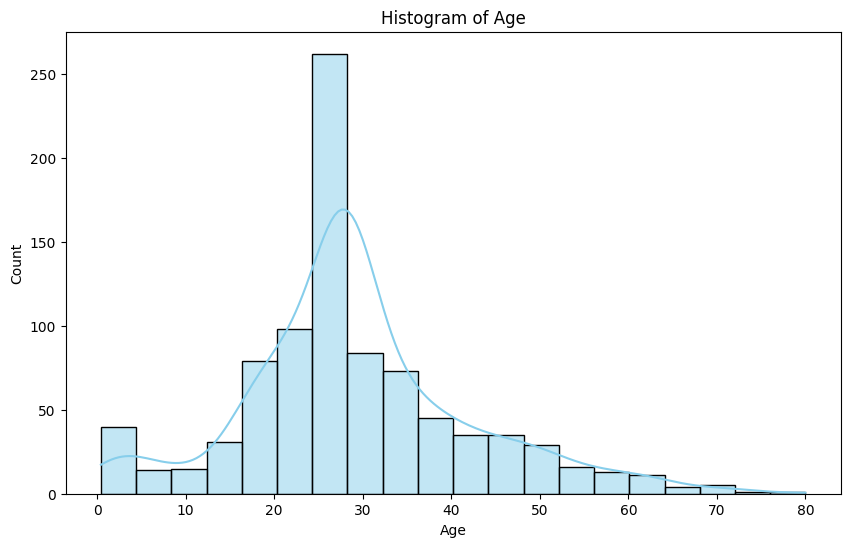

In [296]:
# histogram of age
plt.figure(figsize=(10,6))
sns.histplot(df_train['Age'], bins=20, color='skyblue', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

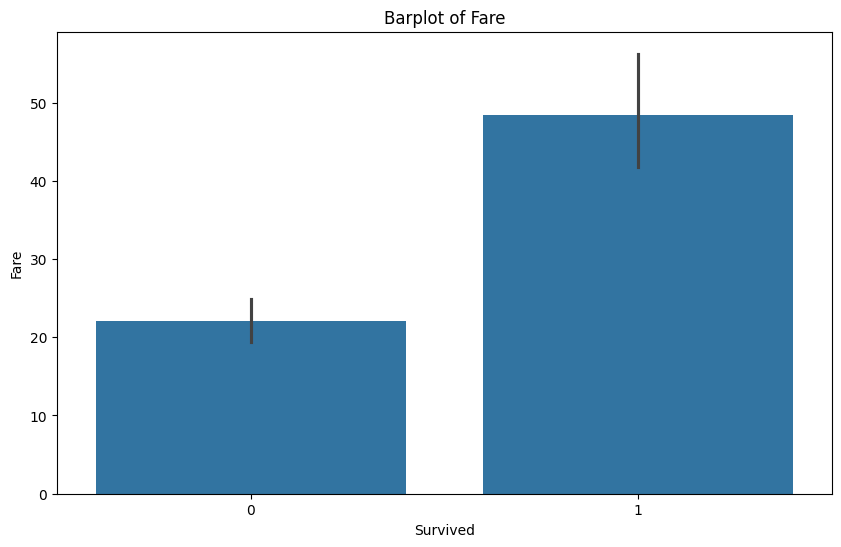

In [297]:
# boxplot of fare 
plt.figure(figsize=(10,6))
sns.barplot(x='Survived', y='Fare', data=df_train)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Barplot of Fare')
plt.show()

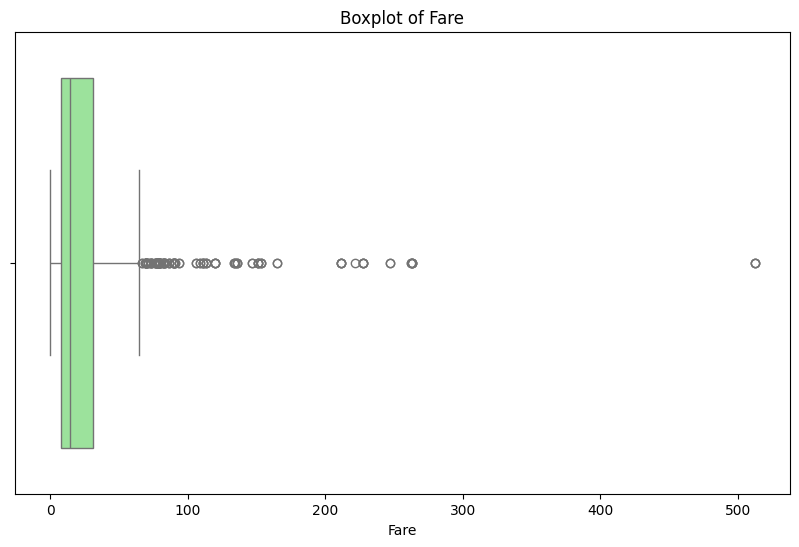

In [298]:
# Boxplot of Fare
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=df_train, color='lightgreen')
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

**1.2 Distribution of Categorical Features**
* You can use bar plots to visualize the distribution of categorical features like Pclass, Sex, Embarked, and Survived

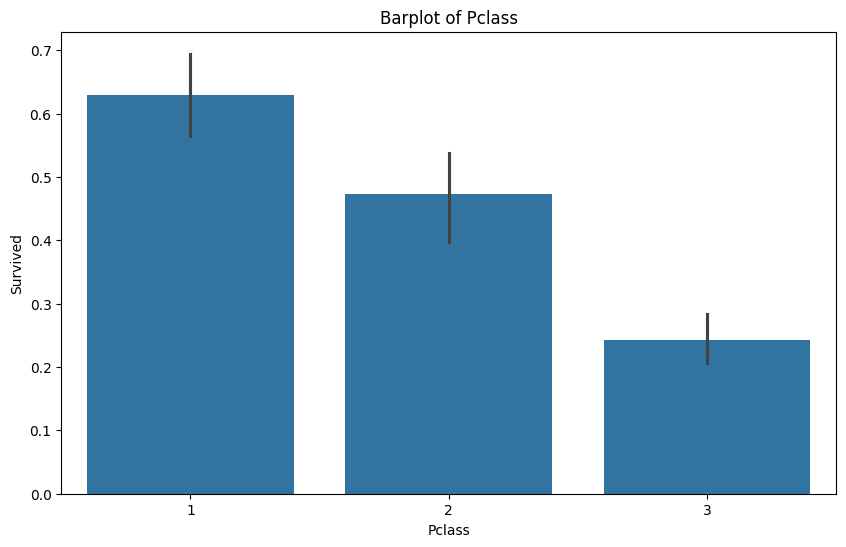

In [299]:
# bar plot for passenger class (Pclass)
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.title('Barplot of Pclass')
plt.show()

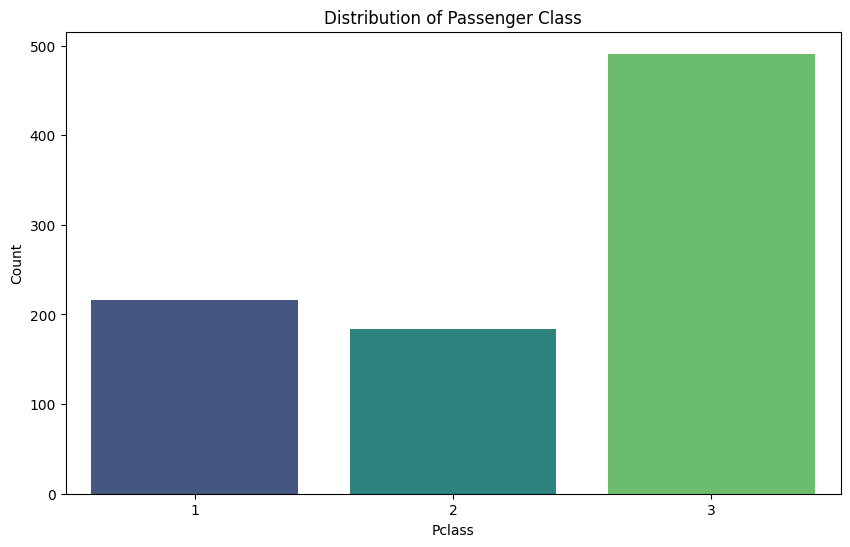

In [300]:
# Bar plot of Passenger Class (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df_train, palette='viridis')
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

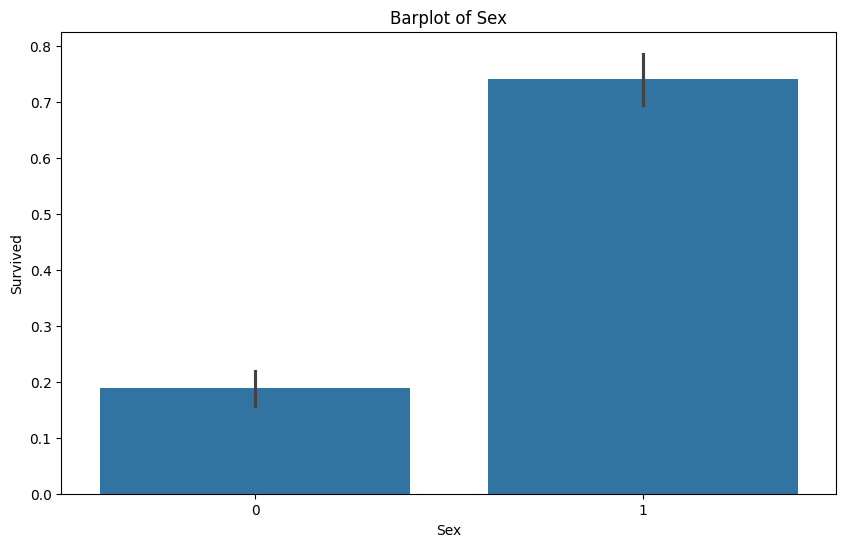

In [301]:
# bar plot for sex 
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Barplot of Sex')
plt.show()

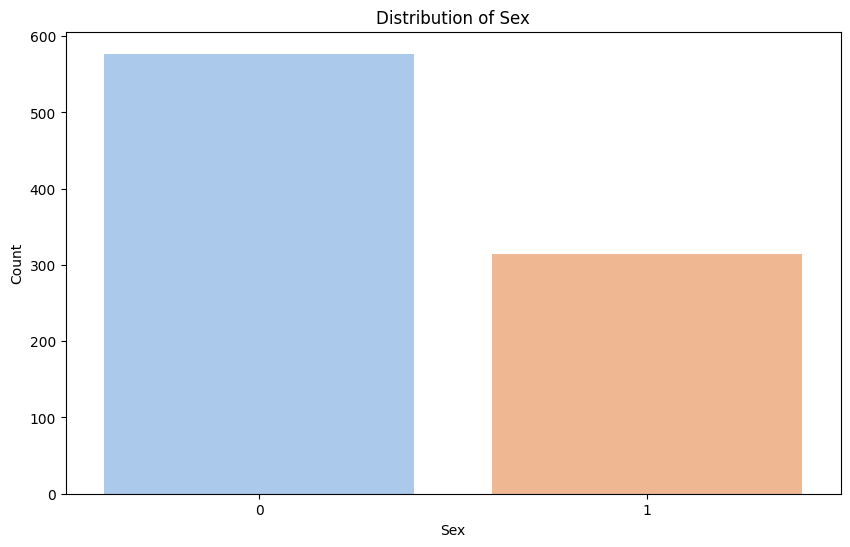

In [302]:
# Bar plot of Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df_train, palette='pastel')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [303]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

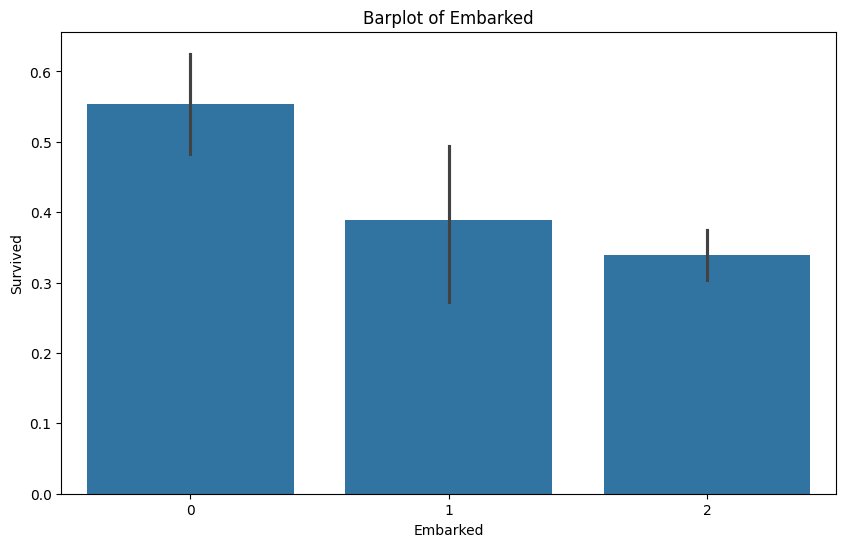

In [304]:
# bar plot for embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.title('Barplot of Embarked')
plt.show()

**2.1 Correlation Heatmap**
* A correlation heatmap shows the correlation between numeric features.

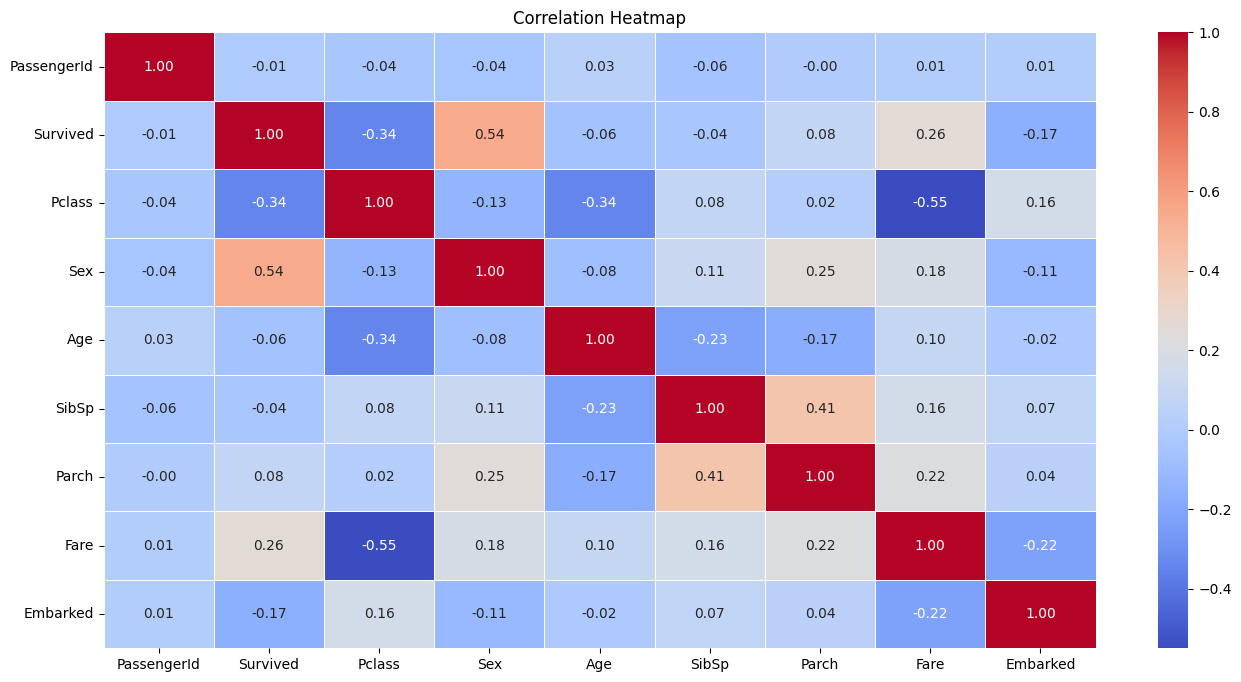

In [305]:
# calculate correlations
corr = df_train.corr()

# plot the heatmap 
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**3.1 Survival Rate by Passenger Class**
* You can use a bar plot to show survival rates by Pclass.

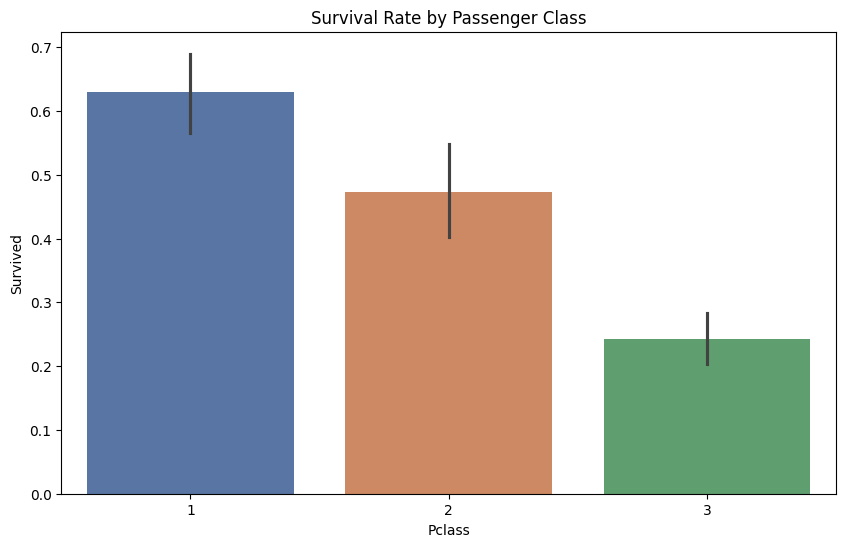

In [306]:
# bar plot for survival rate by Pclass
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df_train, palette='deep')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

**3.2 Survival Rate by Sex**
* A bar plot can reveal survival rates by gender.

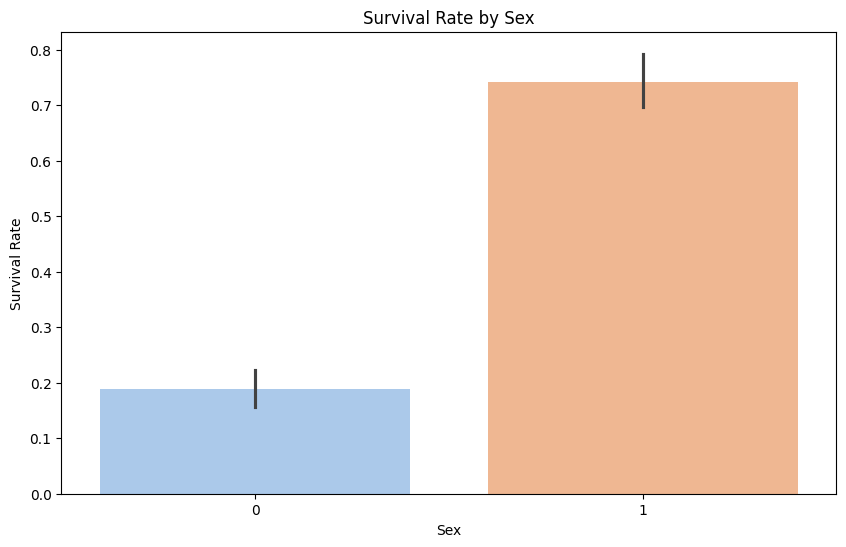

In [307]:
# bar plot for survival rate by sex
plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y='Survived', data=df_train, palette='pastel')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

**Pairplot for Selected Features**
* Use pairplots to explore relationships between selected features.

In [308]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

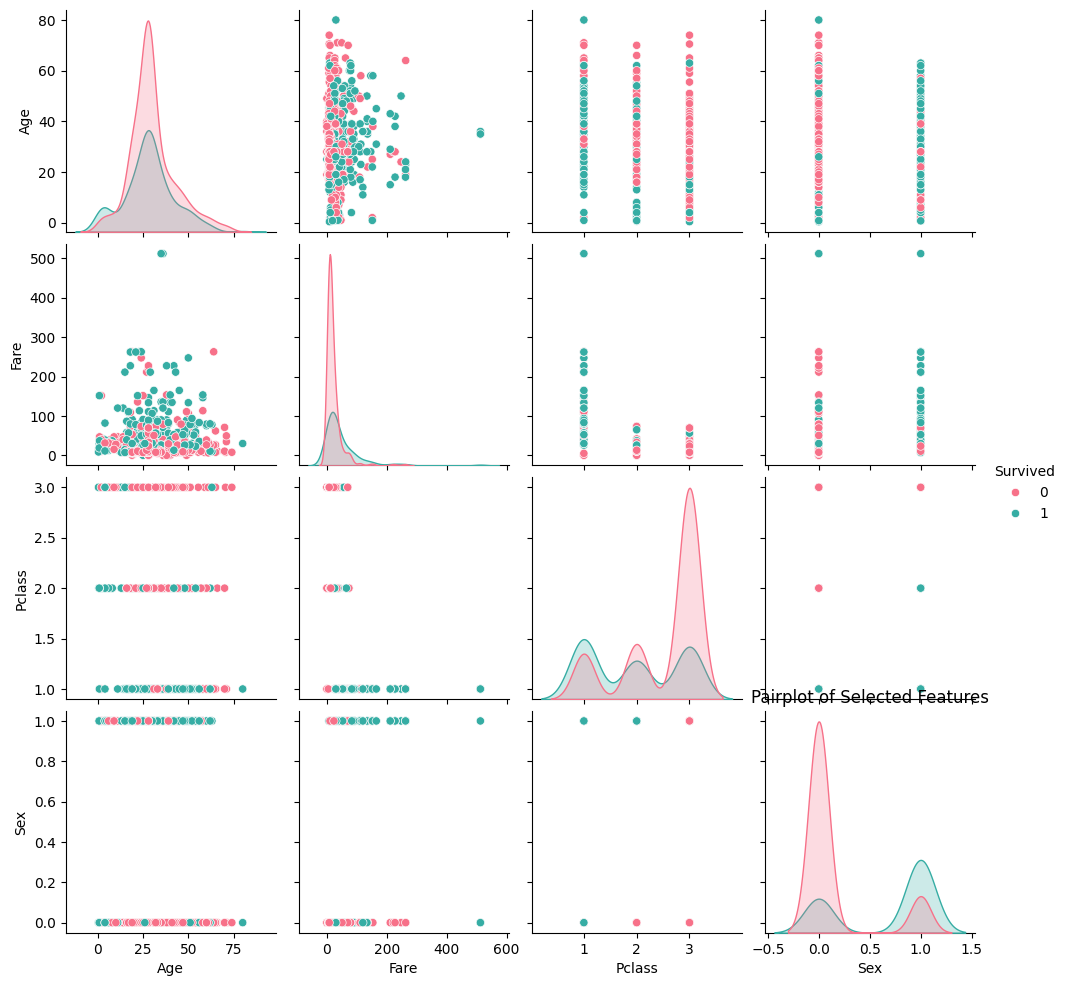

In [309]:
# Select features for pairplot
features = ['Age', 'Fare', 'Pclass','Sex', 'Survived']
sns.pairplot(df_train[features], hue='Survived', palette='husl')
plt.title('Pairplot of Selected Features')
plt.show()

## **4. Model Building**

In [310]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [311]:
# seperate features and target variables
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Logistic Regression**

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on validation data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**2. Random Forest**

In [313]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on validation data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8324022346368715
Confusion Matrix:
 [[94 11]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**3. Gradient Boosting**

In [314]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Predict on validation data
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
Accuracy: 0.8212290502793296
Confusion Matrix:
 [[93 12]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



**Hyperparameter Tuning**
* Use GridSearchCV to find the best hyperparameters for each algorithm.

**Logistic Regression**

In [315]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log_reg, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_log_reg.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best cross-validation score:", grid_log_reg.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.8005121638924457


**Random Forest**

In [316]:
# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.8244065793361568


**Gradient Boosting**

In [317]:
# Define hyperparameters to tune
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_gb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best cross-validation score:", grid_gb.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.8187727765192554


### **Model Evaluation**

In [318]:
# Retrain with best parameters (example for Random Forest)
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Random Forest Performance:
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[93 12]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [319]:
# save the model 
import pickle

# Save the trained Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# Save the trained Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gb, file)

In [320]:
# Load the Random Forest model
with open('random_forest_model.pkl', 'rb') as file:
    rf_loaded = pickle.load(file)

In [321]:
# Make predictions on the test data
predictions = rf.predict(df_test)

# Convert predictions to DataFrame for submission
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('./test.csv')['PassengerId'],  # Include PassengerId for submission
    'Survived': predictions
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

print("Predictions saved to 'submission.csv'")

Predictions saved to 'submission.csv'


In [322]:
# Check submission file
submission = pd.read_csv('submission.csv')
print(submission.head())

# Verify the format and ensure no missing values
print(submission.info())
print(submission.isnull().sum())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None
PassengerId    0
Survived       0
dtype: int64


---
### Conclusion

In this notebook, we have successfully completed the following steps:

1. **Data Loading and Preprocessing:** We loaded the Titanic dataset, handled missing values, and performed feature engineering. This included encoding categorical variables and creating new features such as `FamilySize`, `IsAlone`, `AgeGroup`, and `FareGroup`.

2. **Exploratory Data Analysis (EDA):** We conducted an initial exploration of the data to uncover patterns, relationships, and correlations between features and the target variable. Visualization techniques helped us understand the data better and identify key insights.

3. **Feature Engineering:** We created meaningful features from the existing data to improve the performance of our models. This step included handling categorical variables and engineering new features.

4. **Model Training and Evaluation:** We trained several machine learning models, including Logistic Regression, Random Forest, and Gradient Boosting. We evaluated their performance using accuracy, confusion matrix, and classification report on a validation set.

5. **Model Saving and Prediction:** We saved the best-performing model and used it to make predictions on the test dataset. The predictions were formatted into the required submission format.

6. **Verification and Submission:** We ensured the submission file was correctly formatted and free of missing values. The final validation of the model’s performance will be provided through the Kaggle leaderboard upon submission.

---

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: Muhammad Hassaan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/MHassaan2) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)

---